# Data Analysis of Medical Appointment - No Show

## Business Understanding

No show is defined as patients who miss their scheduled clinic appointments and It is consider as one of the problems that affecting quality of healthcare. For healthcare providers, it leads to waste time and clinic resources. It also impacted on dissatisfaction of patients.

The cuurent project was conducted to investigate the factors the patients' attending medical appointment in order to reduce the ratio of no show appointments 

## Data Understanding

This analysis is exploring no show appointments in consist in Brazilian public health care system.  The data includes some attributes of patients and determin if the patients showed up to their appointments or not. The analysis will focus on finding the most factors that affecting patients attending to their medical appointments.
The dataset was extracted from Kaggle website. 

You can refer to their online website to check the problem description and full detail https://www.kaggle.com/joniarroba/noshowappointments/home

The Data include around 100k medial appointments which has the following variables

#### Independent Variables
1.  PatientId: Identification of a patient
2.  AppointmentID: Identification of the appointment
3.  Gender: Male or Female
4.  ScheduledDay: The day where the appointment was registered in the system
5.  AppointmentDay: Actuall appointment date
6.  Age: Patient's age
7.  Neighbourhood: Appointment site
8.  Scholarship: True or False, it indicates if the patient is in the Bolsa Familia program or not
9.  Hipertension: True or False
10. Diabetes: True or False
11. Alcoholism: True or False
12. Handcap: True or False
13. SMS_received: True or False, it indicates if the patient was received SMS reminder or not.

#### Dependent Variables
1.  No-show: Yes or now. it  indicates if the patient showed up to their appointment or not.


## Questions

This analysis is focus on the following points
1. The percentage of no show appointments
2. The most influenced factors that affect on the appointment stsatus.
3. How patient's age and waiting time are affecting the status of the medical appointment


In [1]:
import numpy as np
import pandas as pd
#from vpython import *
#import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Preperation

before conducting the analysis, data was studied, cleaned and normalized
1. The dataset has 110,527 of medical appointment records , and 14 features in our dataset.
2. There is no missing values in the dataset.
3. Age’s outliers values was removed (negative values and age over 100 years).
4. ScheduleDay and AppointmentDay was converted to Date type
5. Categorical variables (Gender, No-Show) have been encoded to numeric values.
6. AppointmentID, PatientID and Neighbourhood features were droped since they are not very usefull for this analysis
7. Handcap column is encoded to be 0 and 1
8. New features have been added in order to create useful input to our analysis like age group, waiting time, month of schedule date, month of appointment date, weekday of schedule date and weekday of appointment date.



In [2]:
# Load the data
data = pd.read_csv('App_May_2016.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
data.shape

(110527, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# to find missing values
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
data.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Drop outlier age less than 0 or more than 100
data.drop(data[(data.Age == -1) | (data.Age > 100)].index, inplace = True)

# Convert dates
data.ScheduledDay = data.ScheduledDay.apply(np.datetime64)
data.AppointmentDay = data.AppointmentDay.apply(np.datetime64)

# Adding new features
data['ScheduledMonth'] = pd.DatetimeIndex(data['ScheduledDay']).month
data['AppointmentMonth'] = pd.DatetimeIndex(data['AppointmentDay']).month
data['WaitTime'] = data['AppointmentDay'].sub(data['ScheduledDay'], axis = 0)
data['WaitTime'] = data['WaitTime'] / np.timedelta64(1, 'D')
data['WaitTime'] = data['WaitTime'].apply(np.int)
data['ScheduledWeekDay'] = data.ScheduledDay.dt.dayofweek
data['AppointmentWeekDay'] = data.AppointmentDay.dt.dayofweek

# Re-encoded Handcap column to be 0 and 1
data.loc[data.Handcap > 1, 'Handcap'] = 1
data.Handcap.unique()

#data = data.get_dummies(features_log_minmax_transform)

# Drop appointments where scheduled day is after appointment day
data.drop(data[data.WaitTime < 0].index, inplace = True)

# Drop Appointment ID column
data.drop(['AppointmentID'], axis=1, inplace=True)
data.drop(['PatientId'], axis=1, inplace=True)

# convert PatientID to String
#data.PatientId = data.PatientId.apply(lambda p: str(int(p)))

In [8]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledMonth,AppointmentMonth,WaitTime,ScheduledWeekDay,AppointmentWeekDay
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4,0,4,4
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4,0,4,4
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4,0,4,4
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4,0,4,4
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4,0,4,4


In [9]:
def age_group(x):
        if x <= 5:
                return 0
        elif x <= 14:
                return 1
        elif x <= 25:
                return 2
        elif x <= 35:
                return 3
        elif x <= 50:
                return 4
        elif x <= 65:
                return 5
        elif x <= 80:
                return 6
        else:
                return 7

In [10]:
data['ageGroup'] = data['Age'].apply(age_group)

# Convert categoricals variables to numeric values
data['No-show'] = pd.Categorical(data['No-show'])
data['No-show'] = data['No-show'].cat.codes

data['Gender'] = pd.Categorical(data['Gender'])
data['Gender'] = data['Gender'].cat.codes

In [11]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledMonth,AppointmentMonth,WaitTime,ScheduledWeekDay,AppointmentWeekDay,ageGroup
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,4,4,0,4,4,5
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,4,4,0,4,4,5
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,4,4,0,4,4,5
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,4,4,0,4,4,1
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,4,4,0,4,4,5


In [12]:
# Total of medical Appointments in DataSet
print ("Total number of medical appointments  after data cleaning {}" .format(len(data)))

# Number of appointments whit show status
print ("Total number of Show appointments {} with percentage of {:.2f}%".format(sum(data['No-show'] == 0),
       sum(data['No-show'] == 0)/len(data)*100))

# Number of appointments whit no show status
print ("Total number of No Show appointments {} with percentage of {:.2f}%" .format(sum(data['No-show'] == 1),
       sum(data['No-show'] == 1)/len(data)*100))

Total number of medical appointments  after data cleaning 110514
Total number of Show appointments 88203 with percentage of 79.81%
Total number of No Show appointments 22311 with percentage of 20.19%


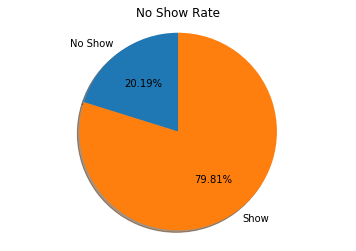

In [13]:
plt.pie([sum(data['No-show'] == 1), sum(data['No-show'] == 0)], shadow=True, startangle=90, labels=['No Show','Show'],autopct='%1.2f%%')
plt.title('No Show Rate') 
plt.axis('equal') 
plt.show()

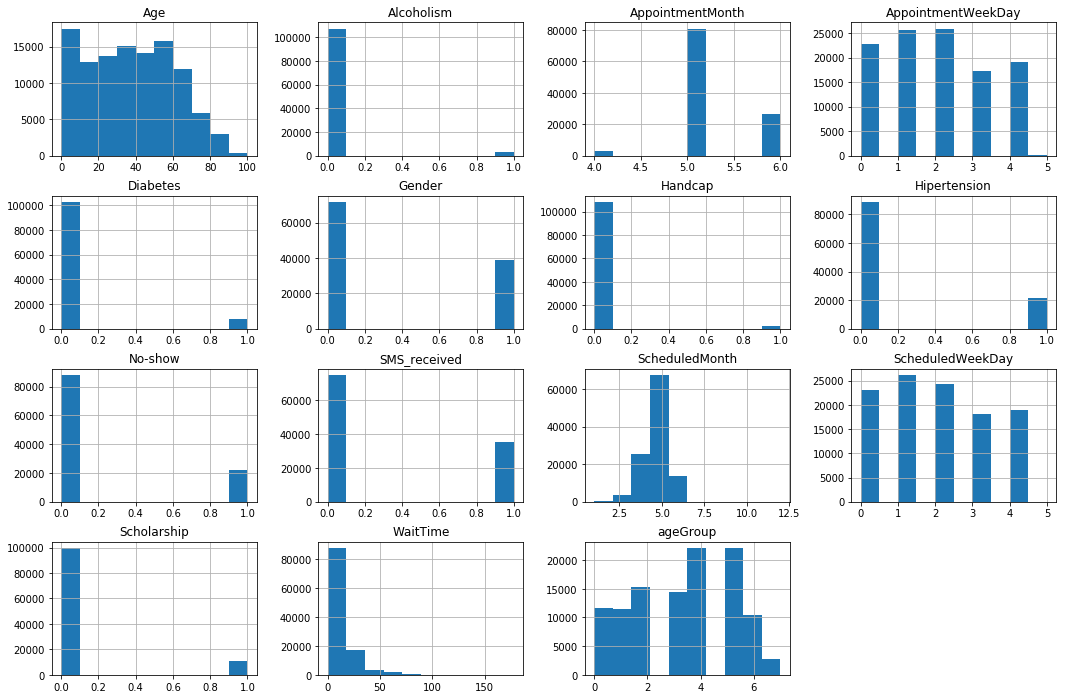

In [14]:
data.hist(figsize=(18, 12));

In [15]:
# Drop un wanted features 
data.drop(['AppointmentDay'], axis=1, inplace=True)
data.drop(['ScheduledDay'], axis=1, inplace=True)
data.drop(['Neighbourhood'], axis=1, inplace=True)


In [16]:
data1 = pd.DataFrame(data)

In [17]:
# Split the data into features and target label
app_status = data['No-show']
df_final = data.drop('No-show', axis = 1)

In [18]:
import visuals as vs
# Normalize Numerical variables
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() 
numerical = ['Age', 'Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap','SMS_received',
             'ScheduledMonth','AppointmentMonth','WaitTime', 'ScheduledWeekDay', 'AppointmentWeekDay','ageGroup']

features_transform = pd.DataFrame(df_final)
features_transform[numerical] = scaler.fit_transform(features_transform[numerical])

# Show an example of a record with scaling applied
display(features_transform.head(n = 5))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledMonth,AppointmentMonth,WaitTime,ScheduledWeekDay,AppointmentWeekDay,ageGroup
0,0.0,0.62,0.0,1.0,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.8,0.8,0.714286
1,1.0,0.56,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.8,0.8,0.714286
2,0.0,0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.8,0.8,0.714286
3,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.8,0.8,0.142857
4,0.0,0.56,0.0,1.0,1.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.8,0.8,0.714286


## Modeling

We decided to use RandomForestClassifier model for identifying the factors that affecting patient's attending to their medical appointment. As shown below, RandomForestClassifier achieves a high F-Score and accuracy value on both training and testing samples. 

RandomForestClassifier is the most appropriate model since our data is cleaned and there is no noisy data which may negatively affected the performance of such a model. 


In [19]:
TP = np.sum(data['No-show']) 
FP = len(df_final) - TP # Specific to the naive case
TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case


# Calculate accuracy, precision and recall
accuracy = (TP + TN)/ len(df_final)
recall = TP / (TP + FN)
precision = TP /(TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2)*(precision * recall)/((0.5**2 * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2019, F-score: 0.2402]


In [20]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_transform, 
                                                    app_status, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 88411 samples.
Testing set has 22103 samples.


In [21]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import accuracy_score, fbeta_score
from sklearn import tree



def train_predict(learner, X_train, y_train, X_test, y_test): 
   
    
    results = {}
    learner = learner.fit(X_train, y_train)
    
    
    # Get the predictions on the test set(X_test),
    
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("{} trained on train sample. with accuracy of {:.4f} and f-score of {:.4f}"
          .format(learner.__class__.__name__, results['acc_train'], results['f_train'] ))
    print("{} trained on test sample. with accuracy of {:.4f} and f-score of {:.4f}"
          .format(learner.__class__.__name__, results['acc_test'], results['f_test'] ))
        
    # Return the results
    return results

In [23]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


# Collect results on the learners
results = {}
clf = RandomForestClassifier(random_state=40)
train_predict(clf, X_train, y_train, X_test, y_test)



# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier trained on train sample. with accuracy of 0.9167 and f-score of 0.8497
RandomForestClassifier trained on test sample. with accuracy of 0.7636 and f-score of 0.3215


{'acc_train': 0.9166666666666666,
 'acc_test': 0.7635615074876714,
 'f_train': 0.8496732026143791,
 'f_test': 0.32151849699786944}

## Deployment

This project has the following findings:
1. Around 20% of patients was missed their medical appointments that are from 29th April to 8th of June, 2016.
2. Age and waiting time (the time from the appointment is scheduled until actual appointment date) as the most factor that affected patients’ attending to their appointment.
3. Regarding the impact of patints’ age, Analysis showed that patients from 15 to 50 years are the ones who most likely to miss their medical appointments.
4. The appointment with waiting time from 5 to 25 days are tend to be missed by patients.

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
#import visuals as vs
from vpython import *


# Import a supervised learning model tto find top factors
clf = RandomForestClassifier()

# Train the supervised model on the training set 
model = clf.fit(X_train,y_train)

# Extract the most importances 
importances = model.feature_importances_


<IPython.core.display.Javascript object>

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:


print('\nFeature Importance:')
x = 0
for i in X_train:
        print(i + ': %0.2f ' % (model.feature_importances_[x]))
        x += 1


Feature Importance:
Gender: 0.03 
Age: 0.37 
Scholarship: 0.01 
Hipertension: 0.01 
Diabetes: 0.01 
Alcoholism: 0.01 
Handcap: 0.01 
SMS_received: 0.02 
ScheduledMonth: 0.04 
AppointmentMonth: 0.02 
WaitTime: 0.26 
ScheduledWeekDay: 0.08 
AppointmentWeekDay: 0.08 
ageGroup: 0.04 


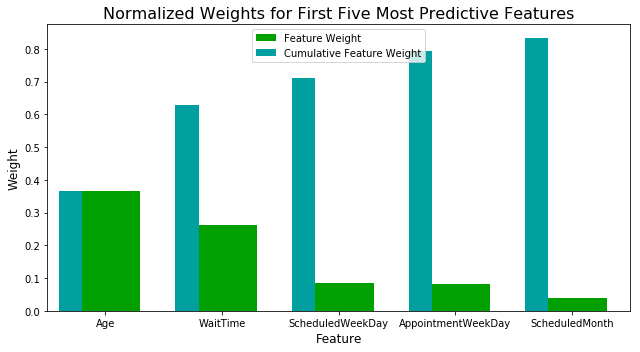

In [26]:
# Plot
vs.feature_plot(importances, X_train, y_train)

In [27]:
data.corr()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledMonth,AppointmentMonth,WaitTime,ScheduledWeekDay,AppointmentWeekDay,ageGroup
Gender,1.000000,-0.106327,-0.114315,-0.055730,-0.032569,0.106164,0.022593,-0.046320,-0.004106,0.013340,-0.006031,-0.027207,0.004835,0.003938,-0.119733
Age,-0.106327,1.000000,-0.092432,0.504802,0.292551,0.095879,0.083091,0.012708,-0.060469,-0.003023,0.014546,0.032717,0.011473,0.003023,0.982459
Scholarship,-0.114315,-0.092432,1.000000,-0.019741,-0.024905,0.035016,-0.008994,0.001174,0.029180,0.016822,-0.002586,-0.030088,-0.004974,-0.000680,-0.076052
Hipertension,-0.055730,0.504802,-0.019741,1.000000,0.433091,0.087967,0.085152,-0.006331,-0.035636,0.025002,0.003744,-0.018775,0.000650,0.003410,0.479789
Diabetes,-0.032569,0.292551,-0.024905,0.433091,1.000000,0.018468,0.059325,-0.014568,-0.015149,0.025605,0.003742,-0.028093,-0.000392,0.006609,0.276211
Alcoholism,0.106164,0.095879,0.035016,0.087967,0.018468,1.000000,0.003762,-0.026159,-0.000175,0.028777,0.003921,-0.037829,0.006625,0.002698,0.099984
Handcap,0.022593,0.083091,-0.008994,0.085152,0.059325,0.003762,1.000000,-0.024997,-0.007881,0.016227,-0.001282,-0.020588,0.001295,0.004769,0.079019
SMS_received,-0.046320,0.012708,0.001174,-0.006331,-0.014568,-0.026159,-0.024997,1.000000,0.126547,-0.294090,0.108050,0.388189,0.078523,-0.089911,0.016801
No-show,-0.004106,-0.060469,0.029180,-0.035636,-0.015149,-0.000175,-0.007881,0.126547,1.000000,-0.160887,-0.020808,0.180139,0.006018,0.001185,-0.054404
ScheduledMonth,0.013340,-0.003023,0.016822,0.025002,0.025605,0.028777,0.016227,-0.294090,-0.160887,1.000000,0.527635,-0.597791,-0.031701,-0.043019,-0.002907


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


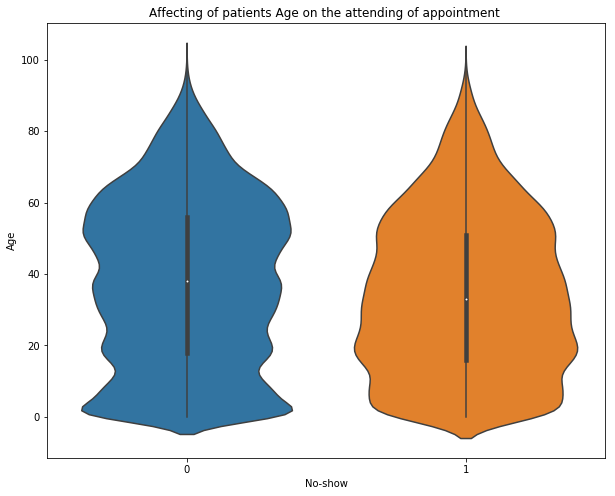

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.violinplot(x='No-show', y='Age', data=data, ax=ax)  
ax.set_title('Affecting of patient''s Age on the attending of appointment ')  
plt.show()  

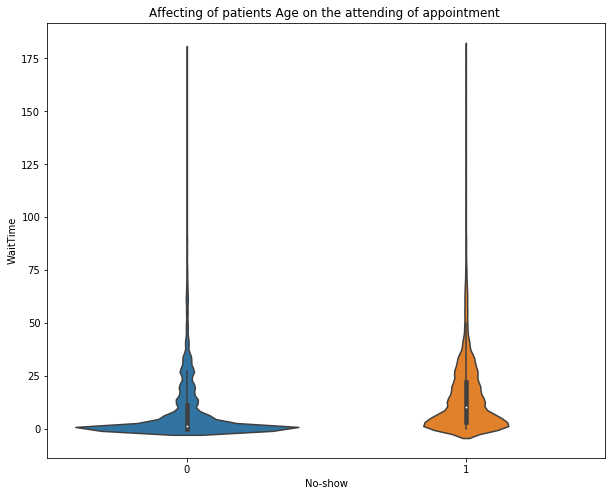

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))  
sns.violinplot(x='No-show', y='WaitTime', data=data, ax=ax)  
ax.set_title('Affecting of patient''s Age on the attending of appointment ')  
plt.show() 